<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

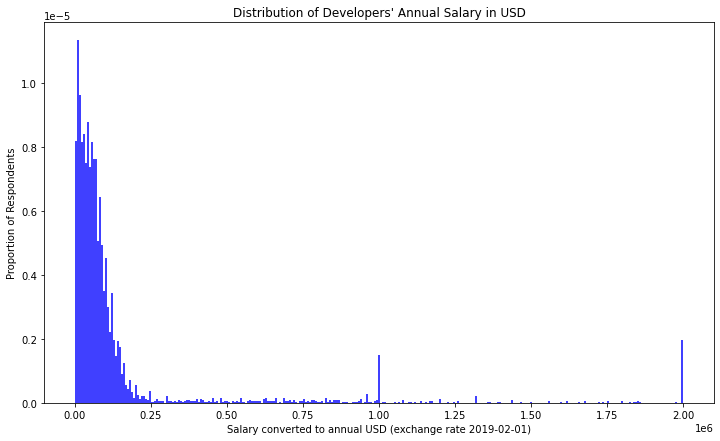

In [17]:
# your code goes here
plt.figure(figsize=(12, 7))

#sns.distplot(df['ConvertedComp'], hist=False, color="r")
sns.histplot(df['ConvertedComp'], color="blue",  label="", kde=False, stat="density", linewidth=0)
plt.title('Distribution of Developers\' Annual Salary in USD')
plt.xlabel('Salary converted to annual USD (exchange rate 2019-02-01)')
plt.ylabel('Proportion of Respondents')

plt.show()
plt.close()

Plot the histogram for the column `ConvertedComp`.


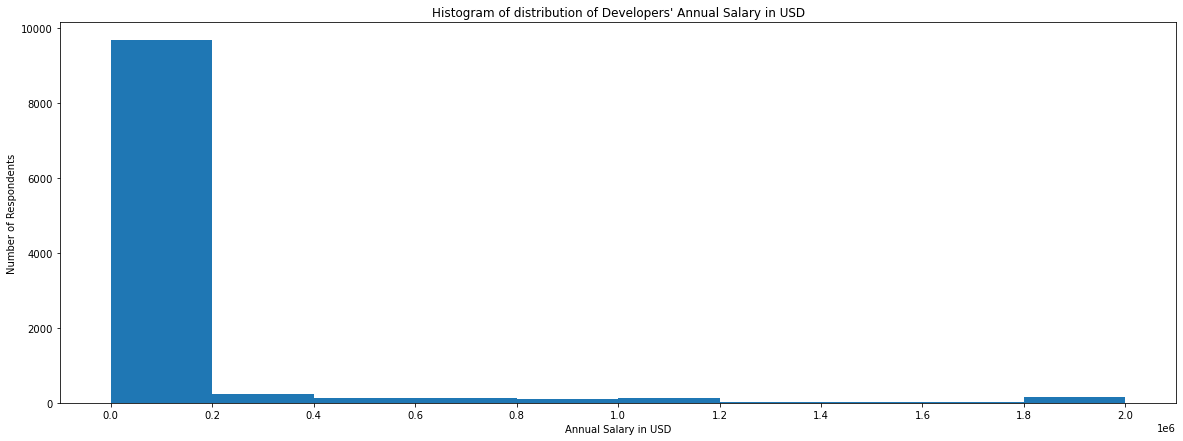

In [20]:
count, bin_edges = np.histogram(df['ConvertedComp'])

#print(count) # frequency count
#print(bin_edges) # bin ranges, default = 10 bins
df['ConvertedComp'].plot(kind='hist', figsize=(20, 7), xticks=bin_edges)

plt.title('Histogram of distribution of Developers\' Annual Salary in USD') # add a title to the histogram
plt.ylabel('Number of Respondents') # add y-label
plt.xlabel('Annual Salary in USD') # add x-label

plt.show()

What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
df['ConvertedComp'].median()

57745.0

The median of the column Age:

In [39]:
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [22]:
# your code goes here
df[df['Gender'] == 'Man'].shape[0]

9725

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [23]:
# your code goes here
df['ConvertedComp'][df['Gender'] == 'Woman'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [24]:
# your code goes here
df.dropna(subset=["Age"], axis=0, inplace=True)
df['Age'].describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


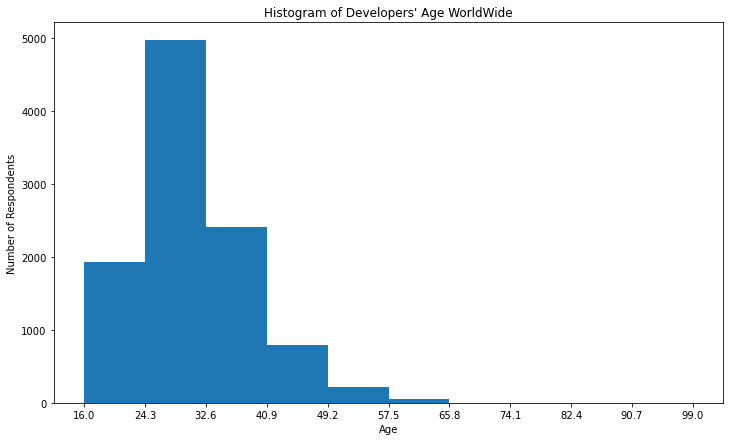

In [26]:
# your code goes here
count, bin_edges = np.histogram(df['Age'])
#print(count)
#print(bin_edges)
df['Age'].plot(kind='hist', figsize=(12,7), xticks=bin_edges)
plt.title("Histogram of Developers\' Age WorldWide")
plt.ylabel("Number of Respondents")
plt.xlabel("Age")

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

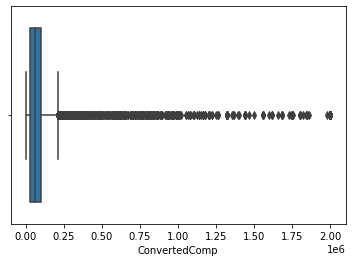

In [30]:
sns.boxplot(x=df["ConvertedComp"])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [32]:
# your code goes here
df['ConvertedComp'].describe()

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('The middle quartiles for ConvertedComp range from',Q1, 'to',Q3,'. The interquartile range is',IQR)

The middle quartiles for ConvertedComp range from 26834.5 to 100000.0 . The interquartile range is 73165.5


Find out the upper and lower bounds.


In [33]:
# your code goes here
min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
print('The min/max for ConvertedComp are',min_val, 'and', max_val)

The min/max for ConvertedComp are 0.0 and 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [35]:
# your code goes here
print('Outliers below:',df['ConvertedComp'].lt(Q1 - 1.5*IQR).sum())
print('Outliers above:',df['ConvertedComp'].gt(Q3 + 1.5*IQR).sum())
print('Median with outliers:',df['ConvertedComp'].median())
print('Median with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].median())
print('Mean with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].mean())

Outliers below: 0
Outliers above: 861
Median with outliers: 57600.0
Median with outliers removed: 52356.0
Mean with outliers removed: 59740.17044137786


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [37]:
# your code goes here
print(df.shape)
print(df['ConvertedComp'].gt(Q3 + 1.5*IQR).shape)

df1 = df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]
print('total number in new dataset:',df1.shape[0])

df[df['ConvertedComp'].gt(Q3 + 1.5*IQR)].shape
print('total number of outliers removed:',df.shape[0])

df3 = df[df['ConvertedComp'].isnull()]
print('total number of nulls removed:',df3.shape[0])
print('total of outliers + inliers + nulls:', (9703 + 879 + 816))

(10354, 85)
(10354,)
total number in new dataset: 9493
total number of outliers removed: 10354
total number of nulls removed: 0
total of outliers + inliers + nulls: 11398


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [38]:
# your code goes here
df.corr()['Age']

Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
